# Practical 2  

In [3]:
import networkx as nx

# Read the edge list file manually and skip the first row
with open('data/Network for IC LT.txt') as file:
    lines = file.readlines()[1:]  # Skip the first row
G = nx.DiGraph()
for line in lines:
    source, target, _ = line.split()
    G.add_edge(source, target)

# Print Graph info
print(G)

DiGraph with 70409 nodes and 1031348 edges


In [4]:
G_hi = G.subgraph([node for node in G.nodes() if G.in_degree(node) > 150])

In [5]:
print(G_hi)

DiGraph with 256 nodes and 1703 edges


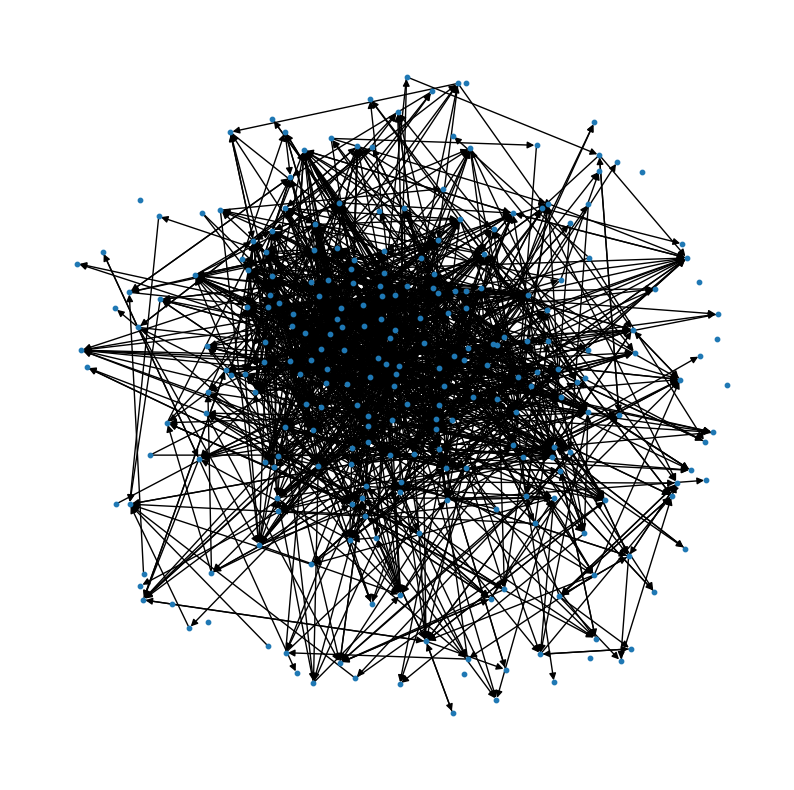

In [6]:
import matplotlib.pyplot as plt

pos = nx.spring_layout(G_hi, k=0.5)
plt.figure(figsize=(10, 10))
nx.draw_networkx(G_hi, pos, with_labels=False, node_size=10)
plt.axis('off')
plt.show()